# Задание 1

In [7]:
from myframe import MyTensor
import numpy as np

a = np.random.rand(2, 3, 3)
b = np.random.rand(3, 3)
c = np.random.rand(3, 3)
d = np.random.rand(3, 3)

import torch

a_torch = torch.tensor(a, requires_grad=True, dtype=torch.float32)
b_torch = torch.tensor(b, requires_grad=True, dtype=torch.float32)
c_torch = torch.tensor(c, requires_grad=True, dtype=torch.float32)
d_torch = torch.tensor(d, requires_grad=True, dtype=torch.float32)

(a_torch * b_torch + c_torch @ d_torch).sum().backward()

a_my = MyTensor(a)
b_my = MyTensor(b)
c_my = MyTensor(c)
d_my = MyTensor(d)

(a_my * b_my + c_my @ d_my).backward()
c_torch.grad, c_my.grad

(tensor([[2.7837, 3.2159, 2.2273],
         [2.7837, 3.2159, 2.2273],
         [2.7837, 3.2159, 2.2273]]),
 array([[2.78368564, 3.21587092, 2.22725389],
        [2.78368564, 3.21587092, 2.22725389],
        [2.78368564, 3.21587092, 2.22725389]]))

In [8]:
weights = torch.tensor(np.array([[0.6, 0.5, 0.4],
                             [0.7, 0.4, 0.8]]), requires_grad=True)
bias = torch.tensor(np.array([0.1, 0.2, 0.3]), requires_grad=True)
input = torch.tensor(np.array([[1.0, 2.0], [1.0, 2.0]]), requires_grad=True)

output = input @ weights + bias

output.sum().backward()

weights.grad, bias.grad

(tensor([[2., 2., 2.],
         [4., 4., 4.]], dtype=torch.float64),
 tensor([2., 2., 2.], dtype=torch.float64))

In [9]:
import numpy as np
from myframe import layer, MyTensor

weights = MyTensor(np.array([[-0.6, 0.5, 0.4],
                             [0.7, -0.4, 0.8]]))
bias = MyTensor(np.array([0.1, 0.2, 0.3]))
input = MyTensor(np.array([[1.0, 2.0], [1.0, 2.0]]))

linear = layer.Linear(weights, bias)
relu = layer.ReLU()
output = relu(linear(input))
output.backward()
print("Output:\n", output)


print("Gradients:")
print("dL/dInput:\n", input.grad)
print("dL/dWeights:\n", linear.weights.grad)
print("dL/dBias:\n", linear.bias.grad)


Output:
 MyTensor(data=[[0.9 0.  2.3]
 [0.9 0.  2.3]], grad=[[1. 1. 1.]
 [1. 1. 1.]])
Gradients:
dL/dInput:
 [[-0.2  1.5]
 [-0.2  1.5]]
dL/dWeights:
 [[2. 0. 2.]
 [4. 0. 4.]]
dL/dBias:
 [2. 0. 2.]


In [10]:
import numpy as np
from myframe import layer, MyTensor

weights = MyTensor(np.array([[-0.6, 0.5, 0.4],
                             [0.7, -0.4, 0.8]]))
bias = MyTensor(np.array([0.1, 0.2, 0.3]))
input = MyTensor(np.array([[1.0, 2.0], [1.0, 2.0]]))

linear = layer.Linear(weights, bias)
sigmoid = layer.Sigmoid()
output = sigmoid(linear(input))
output.backward()
print("Output:\n", output)


print("Gradients:")
print("dL/dInput:\n", input.grad)
print("dL/dWeights:\n", linear.weights.grad)
print("dL/dBias:\n", linear.bias.grad)


Output:
 MyTensor(data=[[0.7109495  0.47502081 0.90887704]
 [0.7109495  0.47502081 0.90887704]], grad=[[1. 1. 1.]
 [1. 1. 1.]])
Gradients:
dL/dInput:
 [[0.03451566 0.11035545]
 [0.03451566 0.11035545]]
dL/dWeights:
 [[0.41100061 0.49875208 0.16563913]
 [0.82200123 0.99750416 0.33127827]]
dL/dBias:
 [0.41100061 0.49875208 0.16563913]


In [11]:
import numpy as np
from myframe import layer, MyTensor

weights = MyTensor(np.array([[-0.6, 0.5, 0.4],
                             [0.7, -0.4, 0.8]]))
bias = MyTensor(np.array([0.1, 0.2, 0.3]))
input = MyTensor(np.array([[1.0, 2.0], [1.0, 2.0]]))

linear = layer.Linear(weights, bias)
relu = layer.ReLU()
softmax = layer.Softmax()
output = softmax(linear(input)) * weights + bias
output.backward()
print("Output:\n", output)


print("Gradients:")
print("dL/dInput:\n", input.grad)
print("dL/dWeights:\n", linear.weights.grad)
print("dL/dBias:\n", linear.bias.grad)


Output:
 MyTensor(data=[[-0.01063825  0.23391795  0.59910681]
 [ 0.22907796  0.17286564  0.89821362]], grad=[[1. 1. 1.]
 [1. 1. 1.]])
Gradients:
dL/dInput:
 [[ 0.15352889 -0.00743402]
 [-0.00743402  0.08955908]]
dL/dWeights:
 [[ 0.03272242  0.0120379   0.95523968]
 [-0.11895224 -0.04376008  1.16271233]]
dL/dBias:
 [1.84832534 1.94420201 2.20747265]


In [12]:
import numpy as np
from myframe import layer, MyTensor
np.random.seed(42)
weights = MyTensor(np.array([[-0.6, 0.5, 0.4],
                             [0.7, -0.4, 0.8]]))
bias = MyTensor(np.array([0.1, 0.2, 0.3]))
input = MyTensor(np.array([[1.0, 2.0], [1.0, 2.0]]))

linear = layer.Linear(weights, bias)
relu = layer.ReLU()
softmax = layer.Softmax()
dropout = layer.Dropout()
dropout.train()
output = dropout(softmax(linear(input)) * weights + bias)
output.backward()
print("Output:\n", output)


print("Gradients:")
print("dL/dInput:\n", input.grad)
print("dL/dWeights:\n", linear.weights.grad)
print("dL/dBias:\n", linear.bias.grad)


Output:
 MyTensor(data=[[-0.02127649  0.          0.        ]
 [ 0.          0.34573128  1.79642724]], grad=[[1. 1. 1.]
 [1. 1. 1.]])
Gradients:
dL/dInput:
 [[1.81974804e-01 3.47888804e-05]
 [1.97435890e-01 1.79158742e-01]]
dL/dWeights:
 [[-0.02229029 -0.11673757  0.50782202]
 [-0.7821689  -0.09780335  2.5111781 ]]
dL/dBias:
 [1.60891555 1.88326243 2.50782202]


In [13]:
import numpy as np
from myframe import layer, MyTensor

np.random.seed(42)

weights = MyTensor(np.array([[-0.6, 0.5, 0.4],
                             [0.7, -0.4, 0.8]]))
bias = MyTensor(np.array([0.1, 0.2, 0.3]))
input = MyTensor(np.array([[1.0, 2.0],
                           [0.5, -1.0]]))

linear = layer.Linear(weights, bias)
relu = layer.ReLU()
softmax = layer.Softmax()
batchnorm = layer.BatchNorm(3)
batchnorm.train()
output = softmax(relu(batchnorm(linear(input)))) * weights + bias
output.backward()

print("Output:\n", output)
print("\nGradients:")
print("dL/dInput:\n", input.grad)
print("dL/dWeights:\n", weights.grad)
print("dL/dBias:\n", bias.grad) 

Output:
 MyTensor(data=[[-0.15339069  0.2776815   0.46892767]
 [ 0.24836098 -0.03044459  0.46955541]], grad=[[1. 1. 1.]
 [1. 1. 1.]])

Gradients:
dL/dInput:
 [[ 7.73802045e-06 -6.13055221e-06]
 [-7.73802045e-06  6.13055221e-06]]
dL/dWeights:
 [[0.42231696 0.15536955 0.42231937]
 [0.21193911 0.57615078 0.21194544]]
dL/dBias:
 [2. 2. 2.]


# Задание 2

In [14]:
from torch.nn import Module
from torch import Tensor
import torch.nn.functional as F
from PIL import Image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [15]:
class MedianFilter(Module):
    def __init__(self, kernel_size: int):
        super().__init__()
        self.kernel_size = kernel_size
        
    def forward(self, image: Tensor) -> Tensor:
        # image = [b, w, h]
        padding = self.kernel_size // 2
        if self.kernel_size % 2 == 0:
            image_padded = F.pad(image, (padding, padding - 1, padding, padding - 1), mode='reflect')
        else:
            image_padded = F.pad(image, (padding, padding, padding, padding), mode='reflect')
        # chunks = [b, w, h, k, k]
        chunks = image_padded.unfold(-2, self.kernel_size, 1).unfold(-2, self.kernel_size, 1)
        chunks = chunks.reshape((*chunks.shape[:3], -1))
        median = torch.median(chunks, dim=-1).values
        return median
    
torch.manual_seed(0)
img = torch.randint(0, 256, (20, 20), dtype=torch.float32)

for k in [3, 5, 10]:
    filter = MedianFilter(k)
    filtered = filter(img.unsqueeze(0))
    print(f"Kernel size {k}:\n", filtered.shape, "\n")
        
        

Kernel size 3:
 torch.Size([1, 20, 20]) 

Kernel size 5:
 torch.Size([1, 20, 20]) 

Kernel size 10:
 torch.Size([1, 20, 20]) 



In [16]:
image = ToTensor()(Image.open("../../../images/kot_mjaukaet.jpg").convert("RGB"))

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

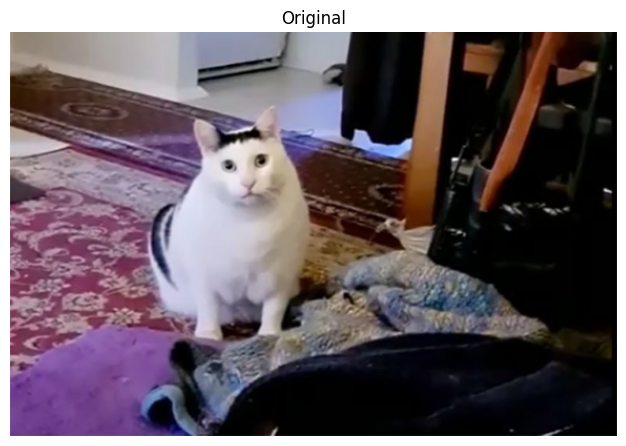

In [17]:
plt.figure(figsize=(36, 24))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(image.permute(1, 2, 0))
plt.axis('off')

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

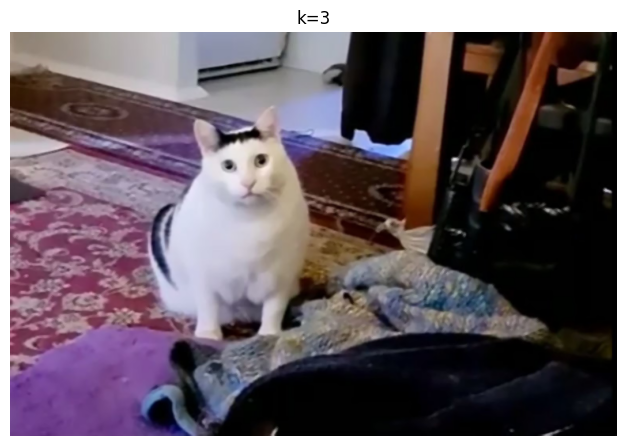

In [18]:
filter = MedianFilter(3)

filtered_image = filter(image)

plt.figure(figsize=(36, 24))
plt.subplot(1, 4, 1)
plt.title("k=3")
plt.imshow(filtered_image.permute(1, 2, 0))
plt.axis('off')

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

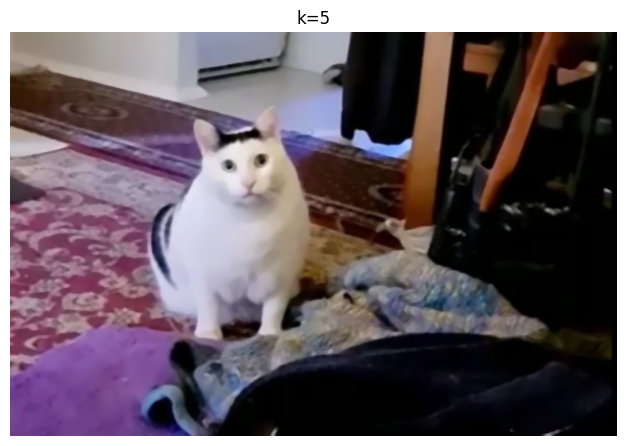

In [19]:
filter = MedianFilter(5)

filtered_image = filter(image)

plt.figure(figsize=(36, 24))
plt.subplot(1, 4, 1)
plt.title("k=5")
plt.imshow(filtered_image.permute(1, 2, 0))
plt.axis('off')

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

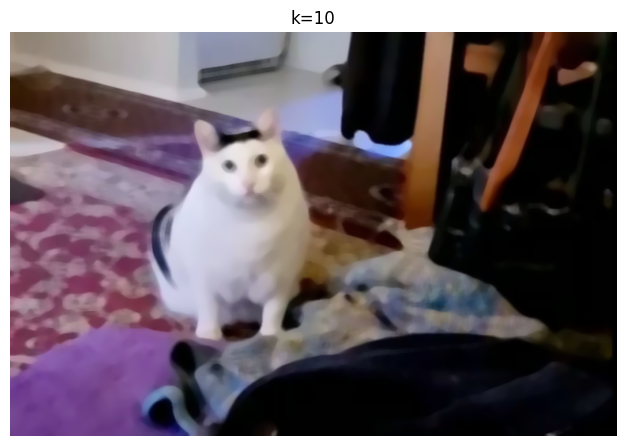

In [20]:
filter = MedianFilter(10)

filtered_image = filter(image)

plt.figure(figsize=(36, 24))
plt.subplot(1, 4, 1)
plt.title("k=10")
plt.imshow(filtered_image.permute(1, 2, 0))
plt.axis('off')

# Задание 3

In [13]:
from Tramsforms import *
from PIL import Image
import matplotlib.pyplot as plt

Original image size: (768, 512)
After transforms: (500, 300)
Tensor shape: torch.Size([3, 300, 500])


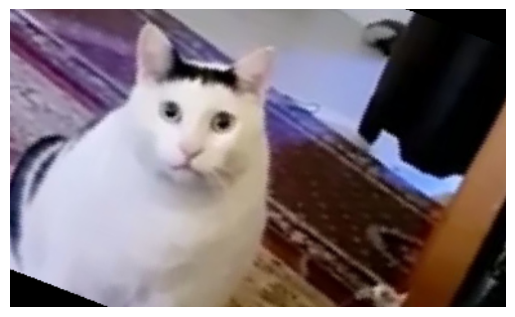

In [15]:
def test_transforms():
    image = Image.open("../../../images/kot_mjaukaet.jpg").convert("RGB")
    print("Original image size:", image.size)

    transforms = Compose([
        RandomCrop(p=1.0, size=(500, 300)),
        RandomRotate(p=1.0, degree=30),
        RandomZoom(p=1.0, scale=(1.1, 1.7)),
    ])
    out = transforms(image)
    print("After transforms:", out.size)

    tensor = ToTensor()(out)
    print("Tensor shape:", tensor.shape)

    transforms = Compose([
        RandomCrop(p=0, size=(20, 20)),
        RandomRotate(p=0, degree=90),
        RandomZoom(p=0, scale=(1.1, 2.0)),
    ])
    out = transforms(out)
    image = ToTensor()(out)
    return image

image = test_transforms()

img_np = image.numpy().transpose(1, 2, 0)
plt.imshow(img_np)
plt.axis("off")
plt.show()

# Задание 4 

In [34]:
from typing import Callable, Optional
from torch.optim import Optimizer
from torch.optim.lr_scheduler import LRScheduler
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torchvision
import Tramsforms as transforms
import torch.nn.functional as F

In [35]:
transform = transforms.Compose([
    transforms.ToTensor()])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [36]:
class ModelTrainer:
    def __init__(self,
                 num_epochs: int,
                 device: torch.device = torch.device('cpu')):
        self.num_epochs = num_epochs
        self.model = None
        self.train_loss_history = []
        self.test_loss_history = []
        self.train_acc_history = []
        self.test_acc_history = []
        self.device = device

    def __call__(self,
                 train_dataloader: DataLoader,
                 model: nn.Module,
                 optimizer: Optimizer,
                 criterion: nn.Module,
                 test_dataloader: Optional[DataLoader] = None,
                 scheduler: Optional[LRScheduler] = None) -> tuple:
        self.model = model.to(self.device)
        self.model.train()
        self.train_loss_history = []
        self.test_loss_history = []
        self.train_acc_history = []
        self.test_acc_history = []

        with tqdm(total=len(train_dataloader) * self.num_epochs, unit="batch", position=0, leave=True) as pbar:
            for epoch in range(self.num_epochs):
                running_loss = 0.0
                y_true_train, y_pred_train = [], []

                for xb, yb in train_dataloader:
                    xb, yb = xb.to(self.device), yb.to(self.device)

                    optimizer.zero_grad()
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()
                    
                    # Для подсчёта точности
                    _, predicted = torch.max(outputs.data, 1)
                    y_true_train.extend(yb.cpu().numpy())
                    y_pred_train.extend(predicted.cpu().numpy())

                    pbar.set_postfix({
                        "Epoch": f"{epoch + 1}/{self.num_epochs}",
                        "Loss": f"{loss.item():.4f}"
                    })
                    pbar.update()

                # Подсчёт точности для эпохи
                train_acc = accuracy_score(y_true_train, y_pred_train)
                self.train_acc_history.append(train_acc)

                # Подсчёт потерь и точности на тесте (если есть)
                if test_dataloader is not None:
                    test_loss, test_acc = self.test(test_dataloader)
                    self.test_loss_history.append(test_loss)
                    self.test_acc_history.append(test_acc)
                else:
                    self.test_loss_history.append(0.0)
                    self.test_acc_history.append(0.0)

                avg_epoch_loss = running_loss / len(train_dataloader)
                self.train_loss_history.append(avg_epoch_loss)

                self.model.train()

                pbar.set_postfix({
                    "Epoch Loss": f"{avg_epoch_loss:.4f}",
                    "Train Acc": f"{train_acc:.4f}",
                    "Test Acc": f"{self.test_acc_history[-1]:.4f}" if test_dataloader else "N/A"
                })

                if scheduler is not None:
                    scheduler.step()

            pbar.close()

        if test_dataloader is not None:
            return (self.train_loss_history[-1], self.test_loss_history[-1]), \
                   (self.train_acc_history[-1], self.test_acc_history[-1])
        return self.train_loss_history[-1], self.train_acc_history[-1]

    def test(self, dataloader: DataLoader) -> tuple:
        self.model.eval()
        running_loss = 0.0
        y_true, y_pred = [], []

        criterion = nn.CrossEntropyLoss()  # Используем для подсчёта потерь
        with torch.no_grad():
            for xb, yb in dataloader:
                xb, yb = xb.to(self.device), yb.to(self.device)
                outputs = self.model(xb)
                loss = criterion(outputs, yb)
                running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                y_true.extend(yb.cpu().numpy())
                y_pred.extend(predicted.cpu().numpy())

        avg_loss = running_loss / len(dataloader)
        accuracy = accuracy_score(y_true, y_pred)
        return avg_loss, accuracy

    def plot_loss_history(self, num_last_epoch: Optional[int] = None):
        if num_last_epoch is None:
            start_epoch = 0
        else:
            start_epoch = len(self.train_loss_history) - num_last_epoch

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Потери
        axes[0].plot(self.train_loss_history[start_epoch:], label="Train Loss", marker='o')
        if self.test_loss_history:
            axes[0].plot(self.test_loss_history[start_epoch:], label="Test Loss", marker='o')
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Loss")
        axes[0].set_title("Loss over Epochs")
        axes[0].legend()
        axes[0].grid(True)

        # Точность
        axes[1].plot(self.train_acc_history[start_epoch:], label="Train Accuracy", marker='o')
        if self.test_acc_history:
            axes[1].plot(self.test_acc_history[start_epoch:], label="Test Accuracy", marker='o')
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Accuracy")
        axes[1].set_title("Accuracy over Epochs")
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, num_classes: int = 10, dropout: float = 0.3):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(16 * 7 * 7, 64)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x)) 
        x = self.dropout(x)
        x = self.fc2(x) 
        return x

In [43]:
def test(name: str, transform: Compose, num_epochs: int = 20):
    print(f"Запуск эксперимента: {name}")
    
    full_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=None)
    full_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)

    train_subset = Subset(full_train, range(3000))
    test_subset = Subset(full_test, range(1000))
    class TransformedDataset:
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform

        def __getitem__(self, idx):
            img, label = self.subset[idx]
            img = self.transform(img)
            return img, label

        def __len__(self):
            return len(self.subset)

    train_ds = TransformedDataset(train_subset, transform)
    test_ds = TransformedDataset(test_subset, transform)

    train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)

    model = Net(num_classes=10)
    trainer = ModelTrainer(num_epochs=num_epochs, device=torch.device('cpu'))

    trainer(
        train_dataloader=train_loader,
        model=model,
        optimizer=torch.optim.Adam(model.parameters(), lr=0.001),
        criterion=nn.CrossEntropyLoss(),
        test_dataloader=test_loader
    )

    return {
        "name": name,
        "train_loss": trainer.train_loss_history,
        "test_loss": trainer.test_loss_history,
        "train_acc": trainer.train_acc_history,
        "test_acc": trainer.test_acc_history,
    }

In [59]:
def run_experiment(experiments):
    results = []
    for name, transform in experiments:
        res = test(name, transform)
        results.append(res)
        
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for res in results:
        axes[0].plot(res["train_loss"], label=f'{res["name"]} (train)')
        axes[1].plot(res["test_loss"], label=f'{res["name"]} (test)')
    
    for res in results:
        axes[2].plot(res["train_acc"], label=f'{res["name"]} (train)')
        axes[3].plot(res["test_acc"], label=f'{res["name"]} (test)')
    
    axes[0].set_title("Train Loss")
    axes[1].set_title("Test Loss")
    axes[2].set_title("Train Accuracy")
    axes[3].set_title("Test Accuracy")

    for ax in axes:
        ax.set_xlabel("Epoch")
        ax.grid(True)
        ax.legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [60]:
no_aug = Compose([ToTensor()])

rotate_aug = Compose([
    RandomRotate(15, p=0.7),
    ToTensor()
])

zoom_aug = Compose([
    RandomZoom((1.1, 1.5), p=0.6),
    ToTensor()
])

all_aug = Compose([
    RandomRotate(10, p=0.5),
    RandomZoom((0.95, 1.05), p=0.5),
    ToTensor()
])

experiments = [
    ("No Augmentation", no_aug),
    ("Random Rotate", rotate_aug),
    ("Random Zoom", zoom_aug),
    ("All Augmentations", all_aug),
]

Запуск эксперимента: No Augmentation


100%|██████████| 940/940 [00:36<00:00, 25.74batch/s, Epoch Loss=0.4398, Train Acc=0.8417, Test Acc=0.8300]


Запуск эксперимента: Random Rotate


100%|██████████| 940/940 [00:31<00:00, 30.17batch/s, Epoch Loss=0.5626, Train Acc=0.7870, Test Acc=0.8040]


Запуск эксперимента: Random Zoom


100%|██████████| 940/940 [00:44<00:00, 21.03batch/s, Epoch Loss=0.5357, Train Acc=0.7960, Test Acc=0.7910]


Запуск эксперимента: All Augmentations


100%|██████████| 940/940 [00:48<00:00, 19.30batch/s, Epoch Loss=0.5228, Train Acc=0.8030, Test Acc=0.8320]


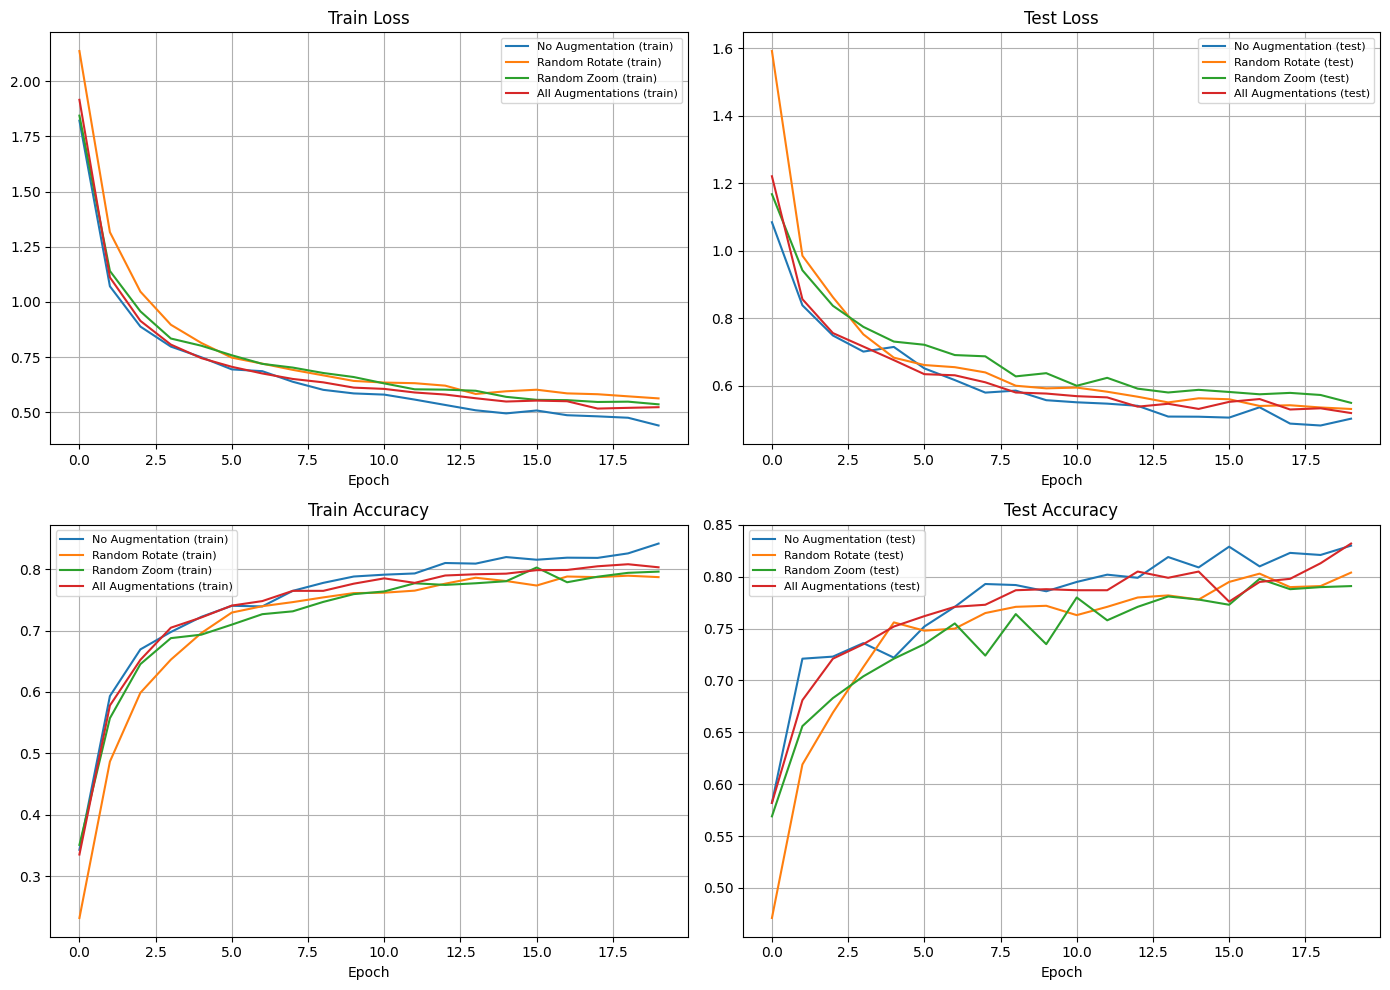

In [61]:
run_experiment(experiments)

In [65]:
ps = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

Запуск эксперимента: zoom, p=0.0


100%|██████████| 940/940 [00:25<00:00, 37.18batch/s, Epoch Loss=0.4538, Train Acc=0.8383, Test Acc=0.8320]


Запуск эксперимента: zoom, p=0.2


100%|██████████| 940/940 [00:14<00:00, 65.05batch/s, Epoch Loss=0.4864, Train Acc=0.8173, Test Acc=0.8170]


Запуск эксперимента: zoom, p=0.4


100%|██████████| 940/940 [00:21<00:00, 42.92batch/s, Epoch Loss=0.4754, Train Acc=0.8247, Test Acc=0.8200]


Запуск эксперимента: zoom, p=0.6


100%|██████████| 940/940 [00:20<00:00, 45.22batch/s, Epoch Loss=0.5588, Train Acc=0.7947, Test Acc=0.8020]


Запуск эксперимента: zoom, p=0.8


100%|██████████| 940/940 [00:25<00:00, 37.12batch/s, Epoch Loss=0.5573, Train Acc=0.7937, Test Acc=0.7930]


Запуск эксперимента: zoom, p=1.0


100%|██████████| 940/940 [00:24<00:00, 39.15batch/s, Epoch Loss=0.5573, Train Acc=0.7950, Test Acc=0.7880]


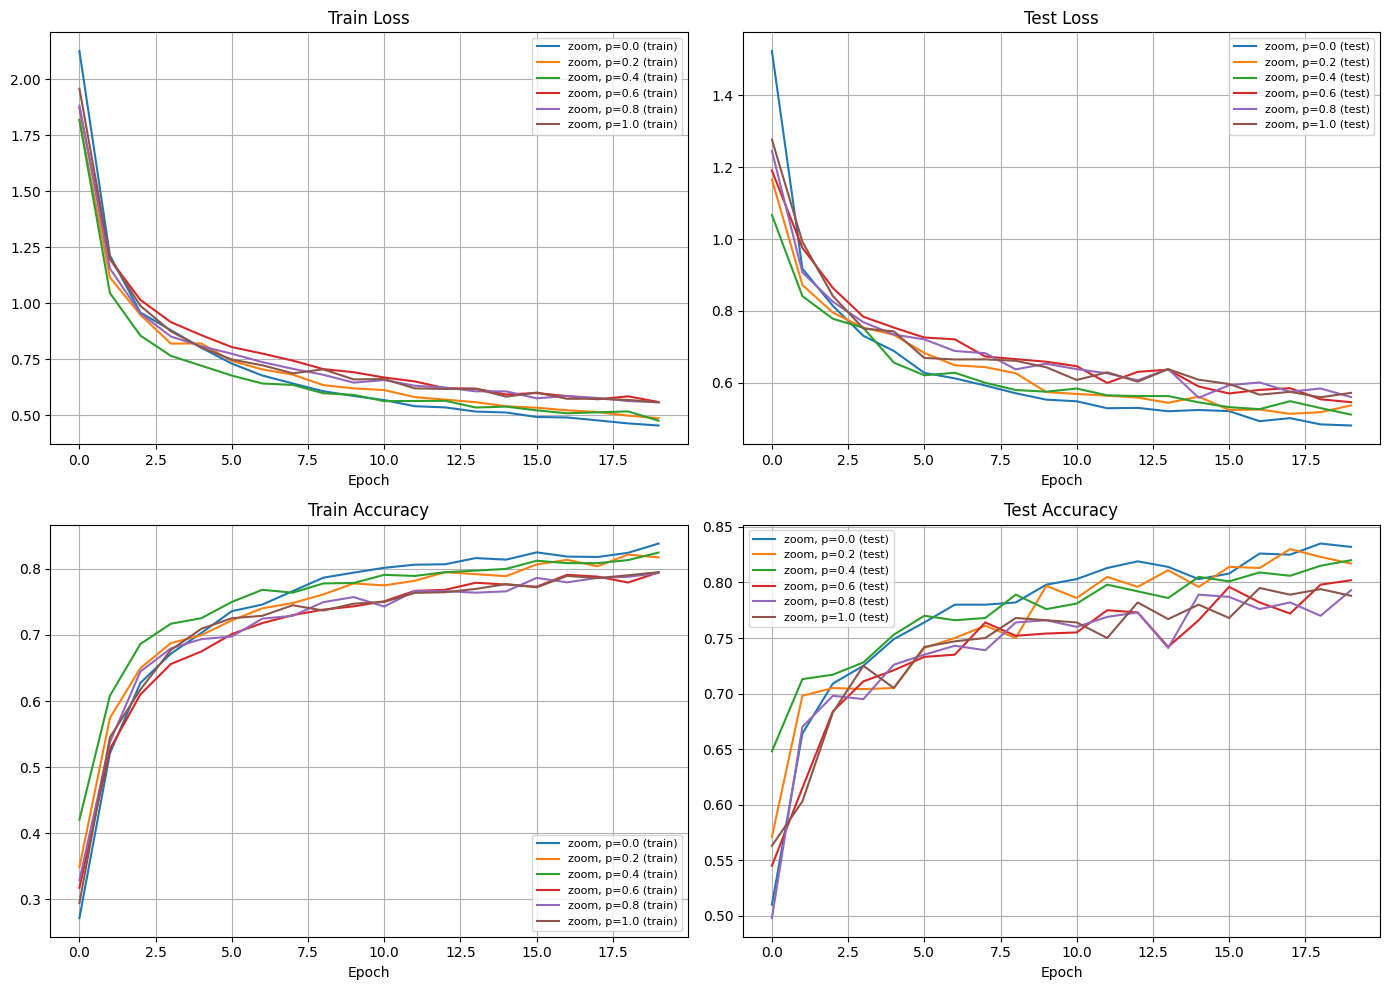

In [68]:
experiments = [(f"zoom, p={p}", Compose([RandomZoom((0.9, 1.4),p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: rotate, p=0.0


100%|██████████| 940/940 [00:19<00:00, 47.97batch/s, Epoch Loss=0.4069, Train Acc=0.8537, Test Acc=0.8440] 


Запуск эксперимента: rotate, p=0.2


100%|██████████| 940/940 [00:11<00:00, 79.41batch/s, Epoch Loss=0.5539, Train Acc=0.7947, Test Acc=0.8030] 


Запуск эксперимента: rotate, p=0.4


100%|██████████| 940/940 [00:29<00:00, 31.94batch/s, Epoch Loss=0.5797, Train Acc=0.7833, Test Acc=0.7960]


Запуск эксперимента: rotate, p=0.6


100%|██████████| 940/940 [00:19<00:00, 49.14batch/s, Epoch Loss=0.5923, Train Acc=0.7813, Test Acc=0.7760]


Запуск эксперимента: rotate, p=0.8


100%|██████████| 940/940 [00:22<00:00, 41.44batch/s, Epoch Loss=0.6032, Train Acc=0.7857, Test Acc=0.7730]


Запуск эксперимента: rotate, p=1.0


100%|██████████| 940/940 [00:23<00:00, 39.69batch/s, Epoch Loss=0.6417, Train Acc=0.7673, Test Acc=0.7500]


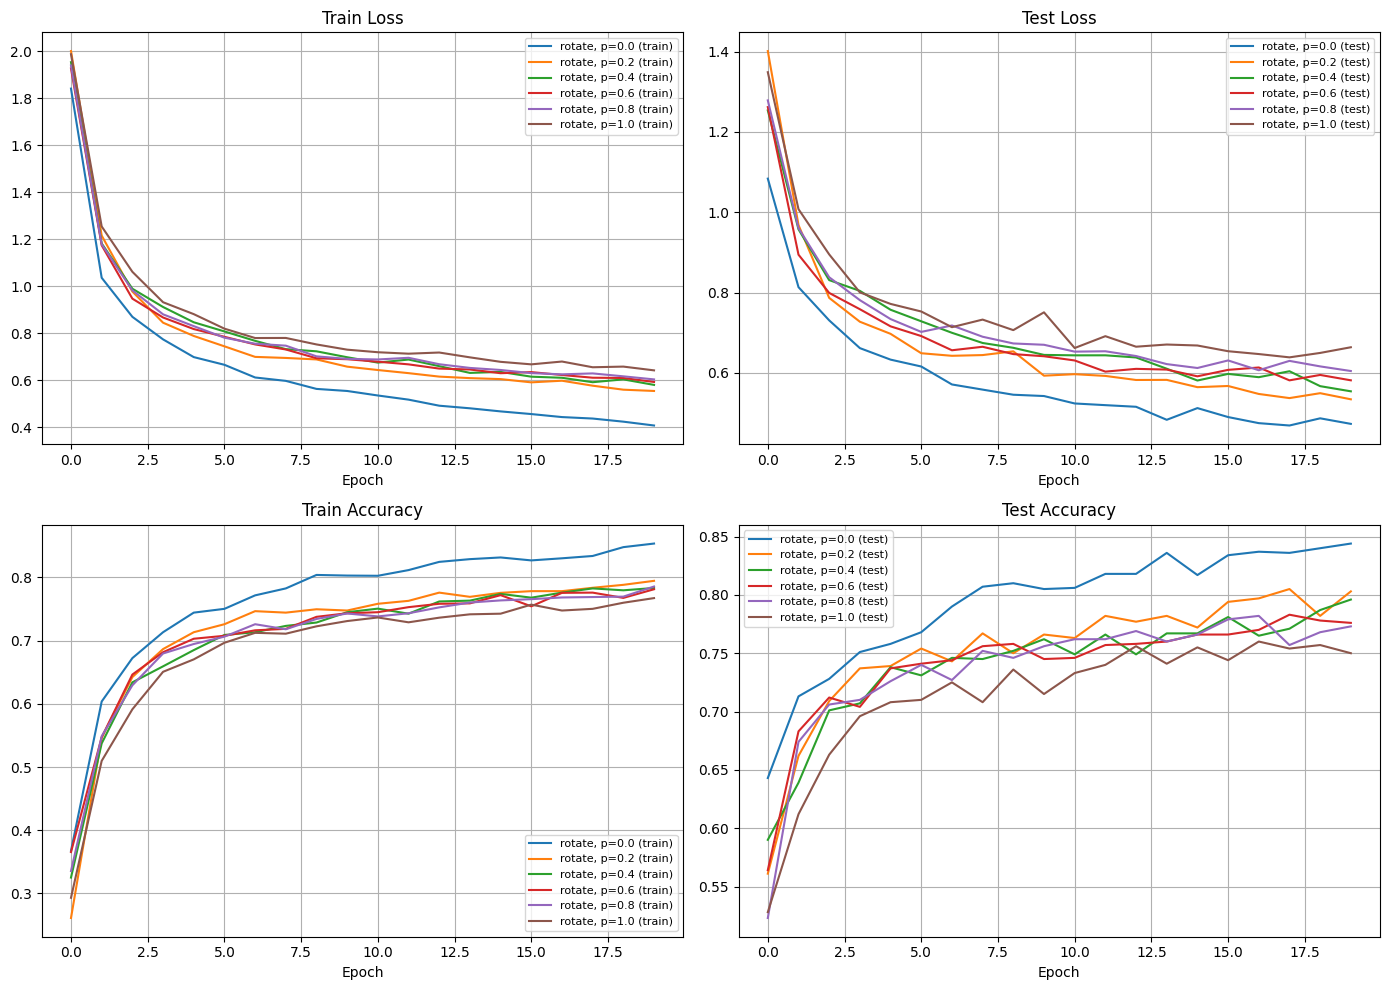

In [70]:
experiments = [(f"rotate, p={p}", Compose([RandomRotate(30,p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: rotate+zoom, p=0.0


100%|██████████| 940/940 [00:21<00:00, 44.39batch/s, Epoch Loss=0.4007, Train Acc=0.8563, Test Acc=0.8470]


Запуск эксперимента: rotate+zoom, p=0.2


100%|██████████| 940/940 [00:22<00:00, 40.92batch/s, Epoch Loss=0.5938, Train Acc=0.7713, Test Acc=0.7780]


Запуск эксперимента: rotate+zoom, p=0.4


100%|██████████| 940/940 [00:26<00:00, 34.97batch/s, Epoch Loss=0.6468, Train Acc=0.7543, Test Acc=0.7570]


Запуск эксперимента: rotate+zoom, p=0.6


100%|██████████| 940/940 [00:30<00:00, 30.74batch/s, Epoch Loss=0.7172, Train Acc=0.7313, Test Acc=0.7380]


Запуск эксперимента: rotate+zoom, p=0.8


100%|██████████| 940/940 [00:31<00:00, 30.13batch/s, Epoch Loss=0.7101, Train Acc=0.7293, Test Acc=0.7450]


Запуск эксперимента: rotate+zoom, p=1.0


100%|██████████| 940/940 [00:42<00:00, 22.21batch/s, Epoch Loss=0.7699, Train Acc=0.7080, Test Acc=0.7240]


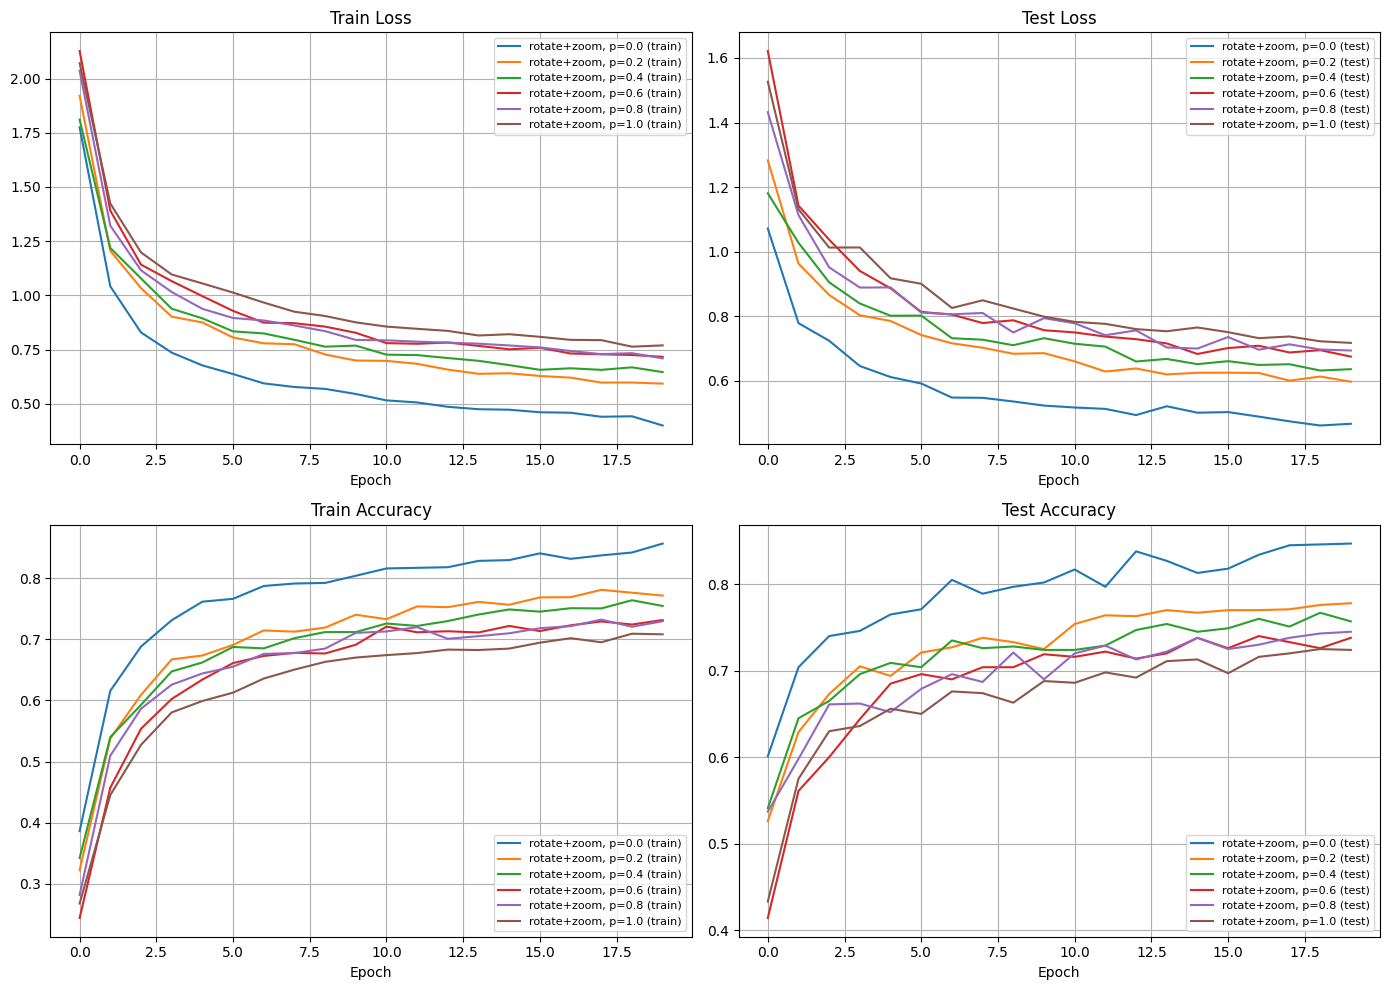

In [71]:
experiments = [(f"rotate+zoom, p={p}", Compose([RandomRotate(30,p=p), RandomZoom((0.9, 1.4),p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: zoom, p=0.0


100%|██████████| 940/940 [00:22<00:00, 41.13batch/s, Epoch Loss=0.4280, Train Acc=0.8400, Test Acc=0.8340] 


Запуск эксперимента: zoom, p=0.2


100%|██████████| 940/940 [00:25<00:00, 37.43batch/s, Epoch Loss=0.5034, Train Acc=0.8120, Test Acc=0.8100]


Запуск эксперимента: zoom, p=0.4


100%|██████████| 940/940 [00:21<00:00, 43.44batch/s, Epoch Loss=0.6919, Train Acc=0.7360, Test Acc=0.7400]


Запуск эксперимента: zoom, p=0.6


100%|██████████| 940/940 [00:20<00:00, 46.83batch/s, Epoch Loss=0.7213, Train Acc=0.7253, Test Acc=0.7340]


Запуск эксперимента: zoom, p=0.8


100%|██████████| 940/940 [00:29<00:00, 32.35batch/s, Epoch Loss=0.8124, Train Acc=0.6983, Test Acc=0.6980]


Запуск эксперимента: zoom, p=1.0


100%|██████████| 940/940 [00:24<00:00, 38.10batch/s, Epoch Loss=0.7978, Train Acc=0.6960, Test Acc=0.7010]


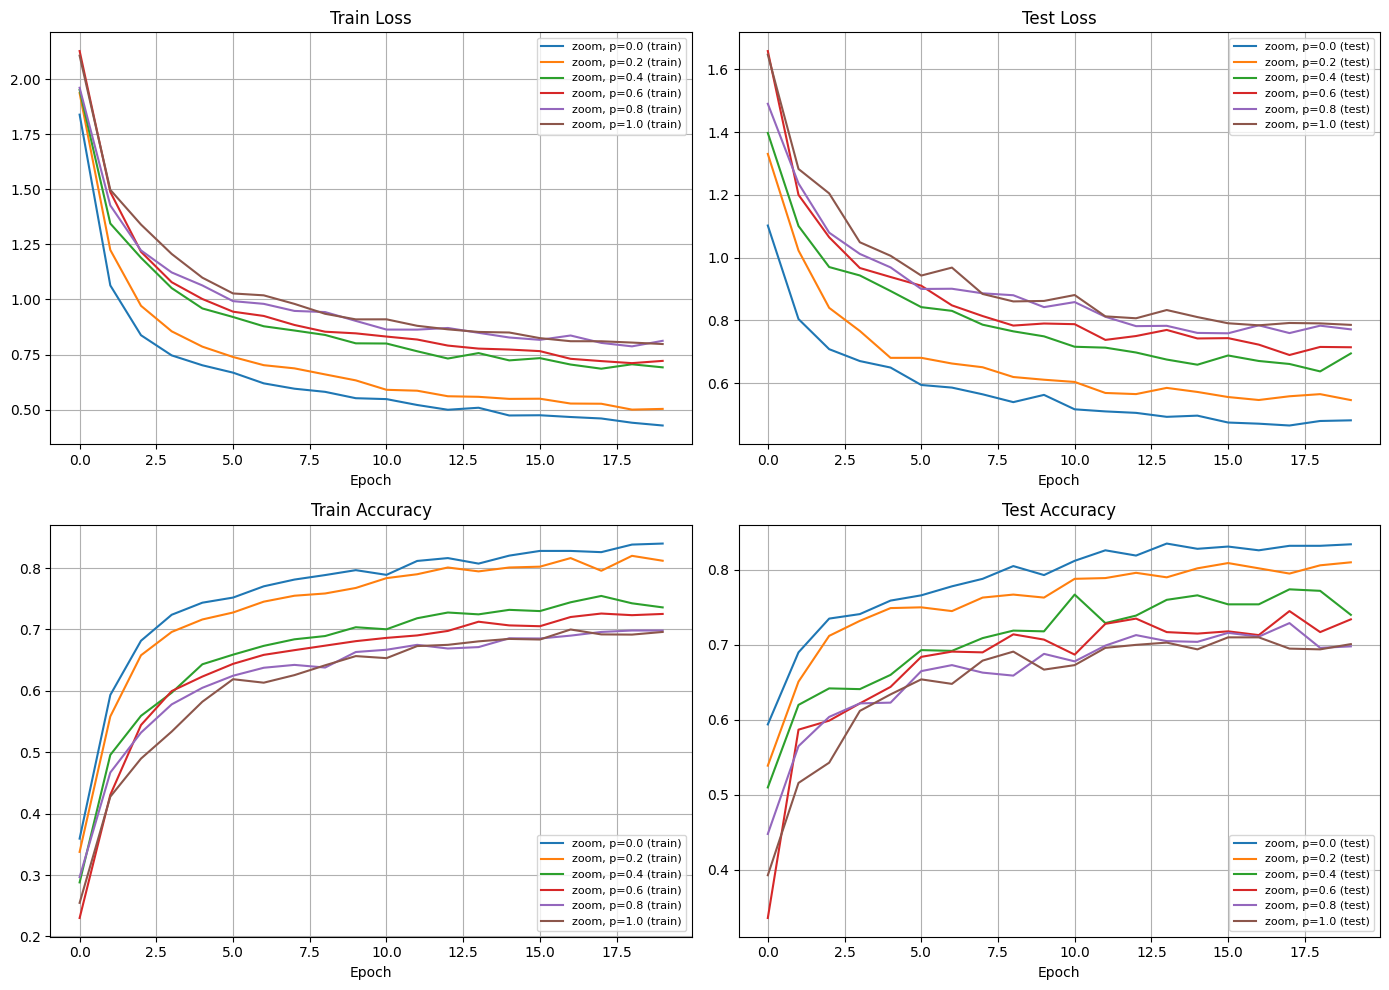

In [72]:
experiments = [(f"zoom, p={p}", Compose([RandomZoom((0.5, 2.0),p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: rotate, p=0.0


100%|██████████| 940/940 [00:13<00:00, 70.13batch/s, Epoch Loss=0.4219, Train Acc=0.8490, Test Acc=0.8270] 


Запуск эксперимента: rotate, p=0.2


100%|██████████| 940/940 [00:20<00:00, 45.94batch/s, Epoch Loss=0.6209, Train Acc=0.7720, Test Acc=0.7750] 


Запуск эксперимента: rotate, p=0.4


100%|██████████| 940/940 [00:21<00:00, 43.63batch/s, Epoch Loss=0.6896, Train Acc=0.7477, Test Acc=0.7540]


Запуск эксперимента: rotate, p=0.6


100%|██████████| 940/940 [00:21<00:00, 44.15batch/s, Epoch Loss=0.7885, Train Acc=0.7117, Test Acc=0.7220]


Запуск эксперимента: rotate, p=0.8


100%|██████████| 940/940 [00:20<00:00, 46.58batch/s, Epoch Loss=0.7426, Train Acc=0.7327, Test Acc=0.7520]


Запуск эксперимента: rotate, p=1.0


100%|██████████| 940/940 [00:22<00:00, 41.91batch/s, Epoch Loss=0.8111, Train Acc=0.7103, Test Acc=0.7320]


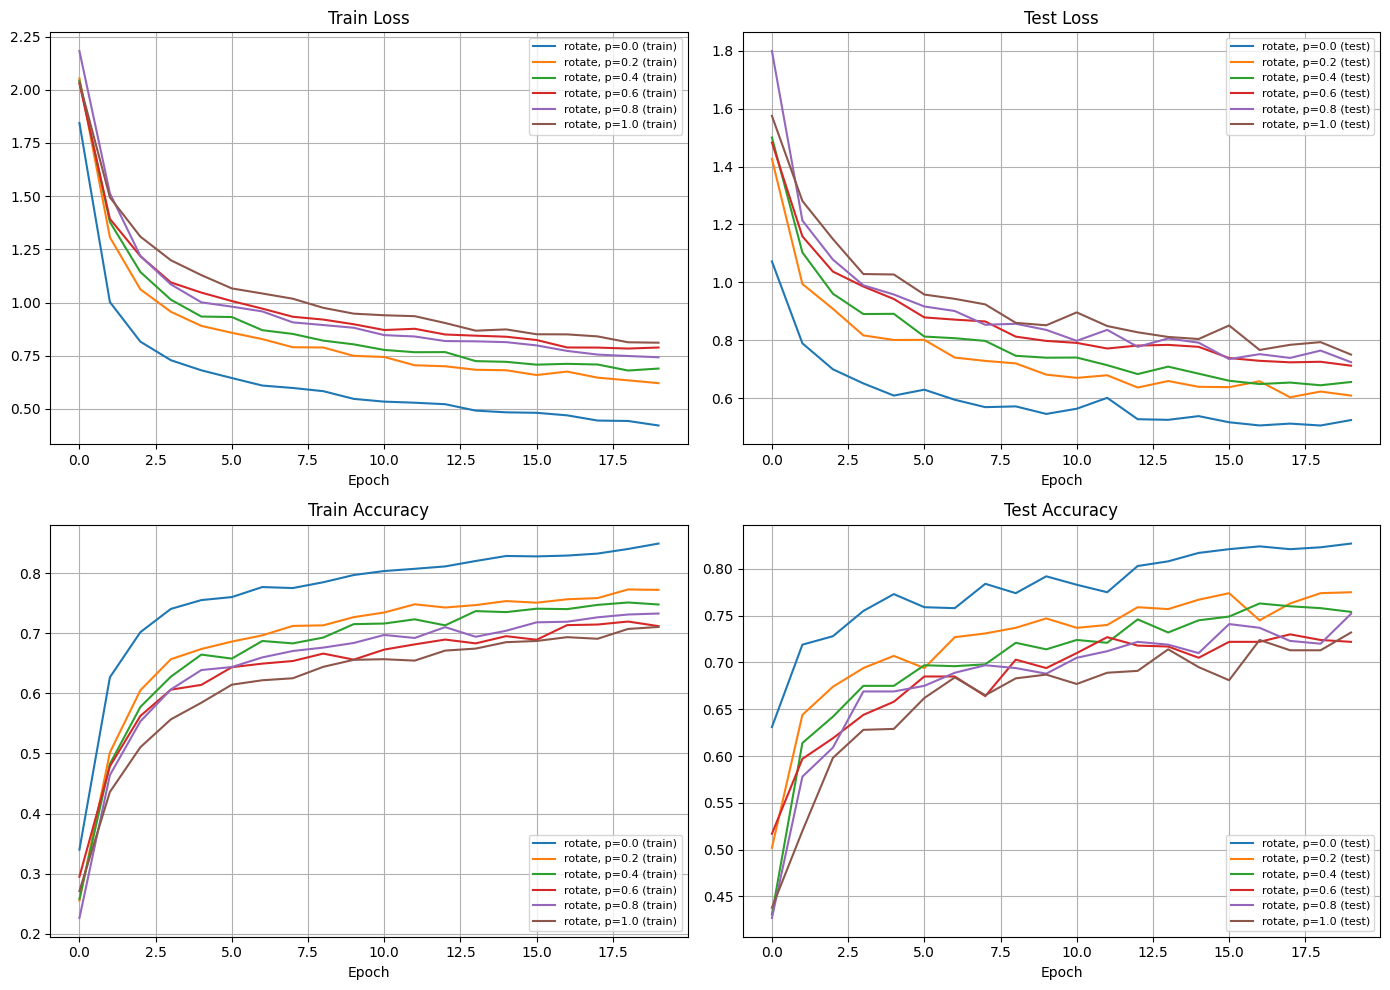

In [73]:
experiments = [(f"rotate, p={p}", Compose([RandomRotate(60,p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: rotate, p=0.0


100%|██████████| 940/940 [00:24<00:00, 37.90batch/s, Epoch Loss=0.3970, Train Acc=0.8547, Test Acc=0.8410]


Запуск эксперимента: rotate, p=0.2


100%|██████████| 940/940 [00:26<00:00, 35.52batch/s, Epoch Loss=0.5559, Train Acc=0.7933, Test Acc=0.8030]


Запуск эксперимента: rotate, p=0.4


100%|██████████| 940/940 [00:21<00:00, 43.24batch/s, Epoch Loss=0.5959, Train Acc=0.7833, Test Acc=0.7860]


Запуск эксперимента: rotate, p=0.6


100%|██████████| 940/940 [00:10<00:00, 91.53batch/s, Epoch Loss=0.6440, Train Acc=0.7663, Test Acc=0.7840] 


Запуск эксперимента: rotate, p=0.8


100%|██████████| 940/940 [00:11<00:00, 83.71batch/s, Epoch Loss=0.7115, Train Acc=0.7427, Test Acc=0.7440] 


Запуск эксперимента: rotate, p=1.0


100%|██████████| 940/940 [00:10<00:00, 86.93batch/s, Epoch Loss=0.7084, Train Acc=0.7343, Test Acc=0.7620] 


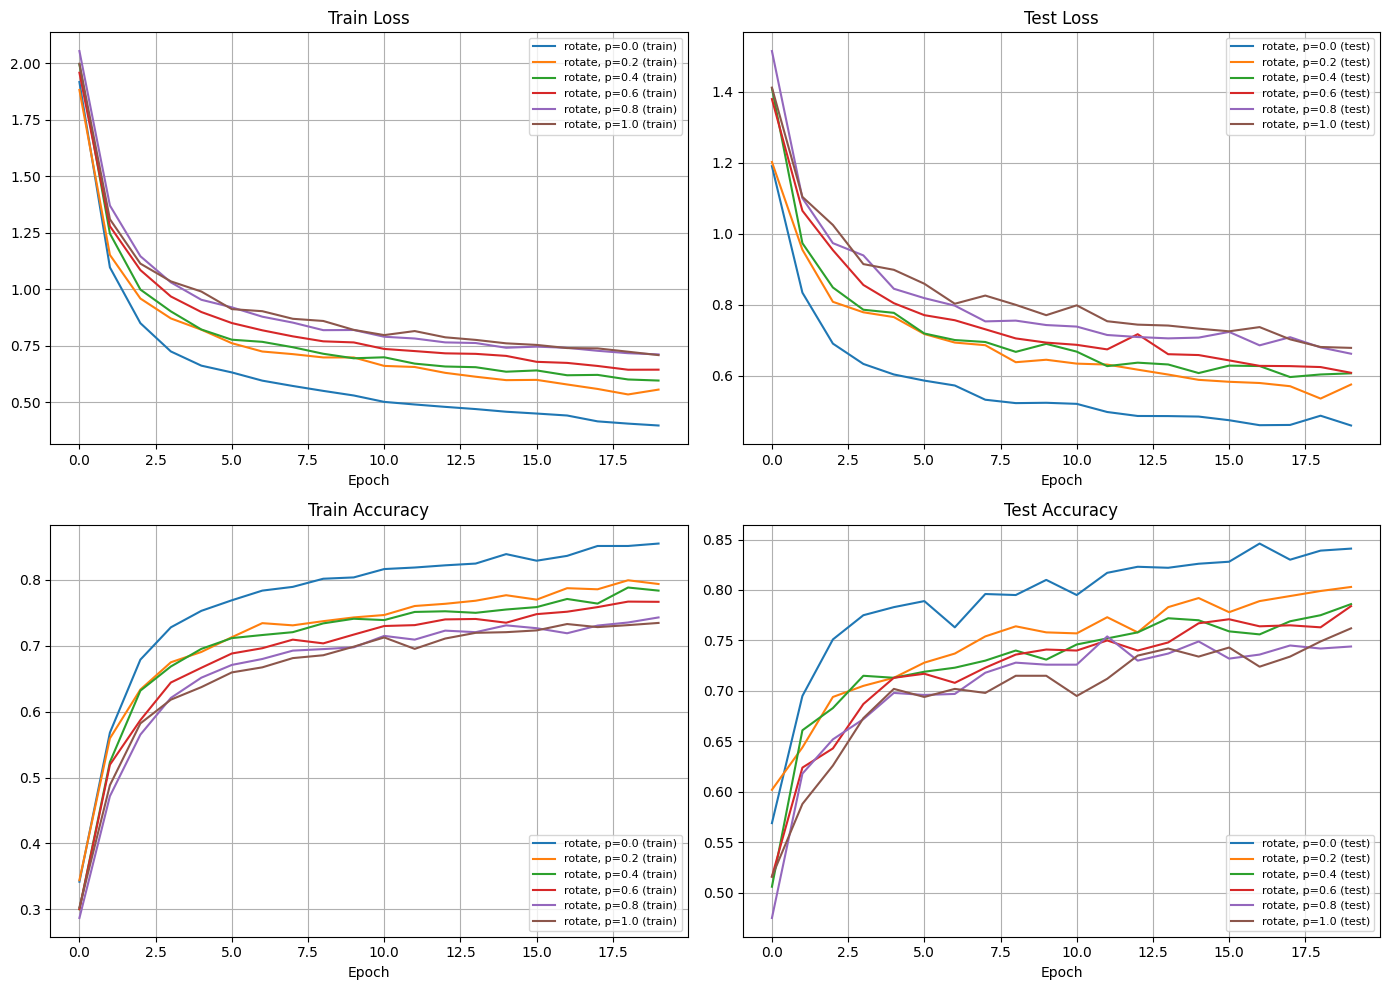

In [74]:
experiments = [(f"rotate, p={p}", Compose([RandomRotate(45,p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: rotate, p=0.0


100%|██████████| 940/940 [00:19<00:00, 48.41batch/s, Epoch Loss=0.4702, Train Acc=0.8173, Test Acc=0.8330] 


Запуск эксперимента: rotate, p=0.2


100%|██████████| 940/940 [00:18<00:00, 49.53batch/s, Epoch Loss=0.6492, Train Acc=0.7630, Test Acc=0.7790]


Запуск эксперимента: rotate, p=0.4


100%|██████████| 940/940 [00:19<00:00, 48.61batch/s, Epoch Loss=0.7907, Train Acc=0.7153, Test Acc=0.7360]


Запуск эксперимента: rotate, p=0.6


100%|██████████| 940/940 [00:20<00:00, 44.87batch/s, Epoch Loss=0.8767, Train Acc=0.6767, Test Acc=0.6840]


Запуск эксперимента: rotate, p=0.8


100%|██████████| 940/940 [00:21<00:00, 43.22batch/s, Epoch Loss=0.9722, Train Acc=0.6423, Test Acc=0.6670]


Запуск эксперимента: rotate, p=1.0


100%|██████████| 940/940 [00:22<00:00, 41.88batch/s, Epoch Loss=0.9783, Train Acc=0.6433, Test Acc=0.6850]


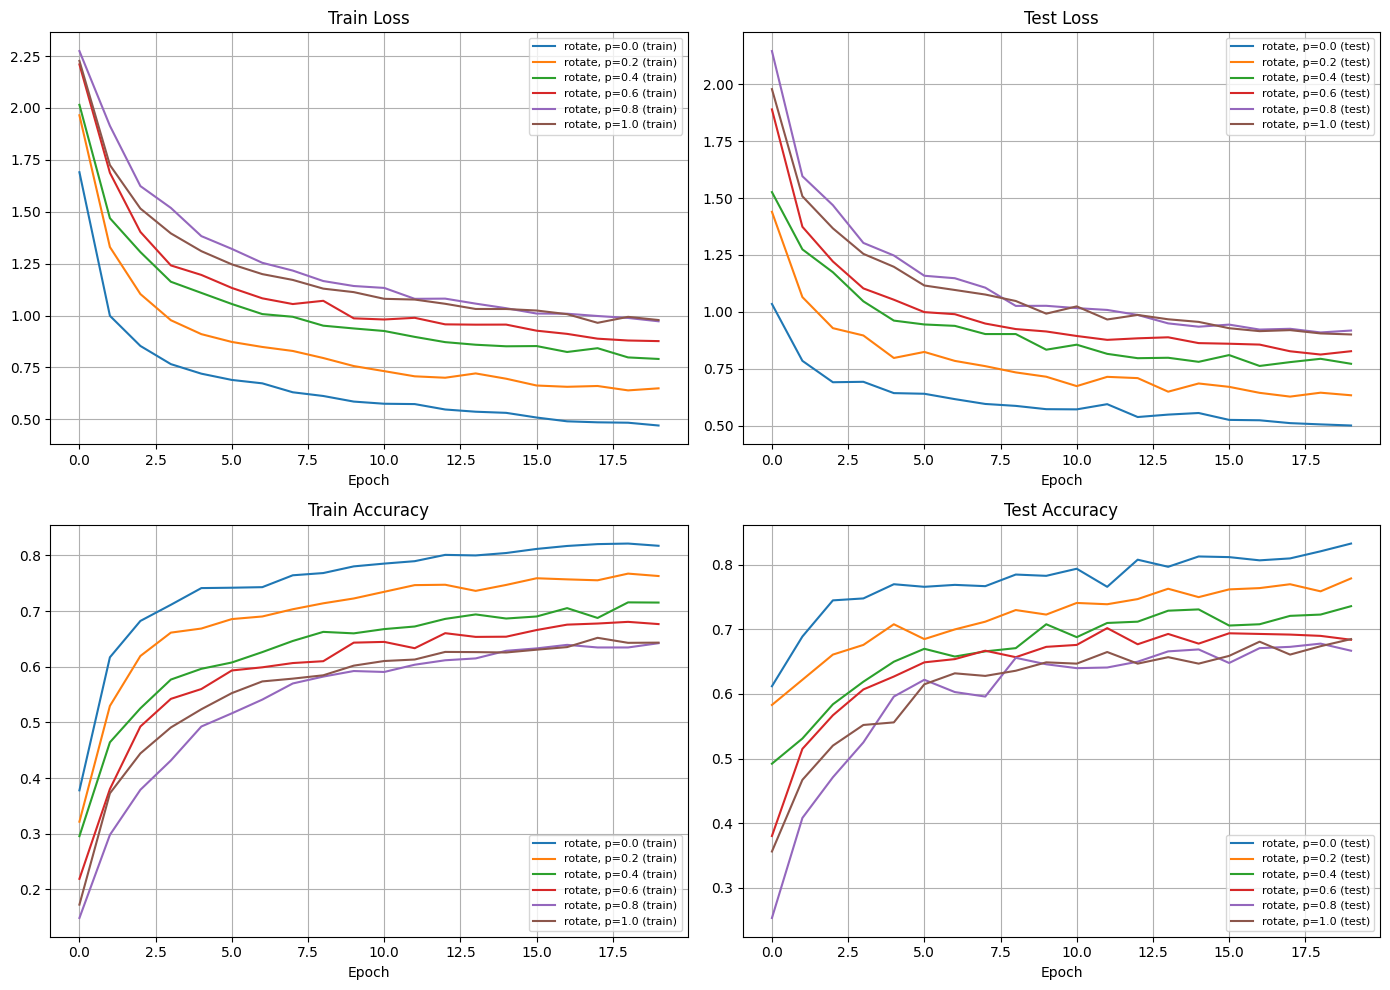

In [75]:
experiments = [(f"rotate, p={p}", Compose([RandomRotate(90,p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)

Запуск эксперимента: zoom, p=0.0


100%|██████████| 940/940 [00:13<00:00, 68.02batch/s, Epoch Loss=0.4442, Train Acc=0.8377, Test Acc=0.8390] 


Запуск эксперимента: zoom, p=0.2


100%|██████████| 940/940 [00:16<00:00, 55.37batch/s, Epoch Loss=0.5203, Train Acc=0.8117, Test Acc=0.7970] 


Запуск эксперимента: zoom, p=0.4


100%|██████████| 940/940 [00:18<00:00, 50.55batch/s, Epoch Loss=0.6085, Train Acc=0.7757, Test Acc=0.7790] 


Запуск эксперимента: zoom, p=0.6


100%|██████████| 940/940 [00:12<00:00, 73.43batch/s, Epoch Loss=0.6461, Train Acc=0.7550, Test Acc=0.7480] 


Запуск эксперимента: zoom, p=0.8


100%|██████████| 940/940 [00:10<00:00, 87.94batch/s, Epoch Loss=0.6686, Train Acc=0.7633, Test Acc=0.7390] 


Запуск эксперимента: zoom, p=1.0


100%|██████████| 940/940 [00:21<00:00, 43.32batch/s, Epoch Loss=0.6543, Train Acc=0.7560, Test Acc=0.7530]


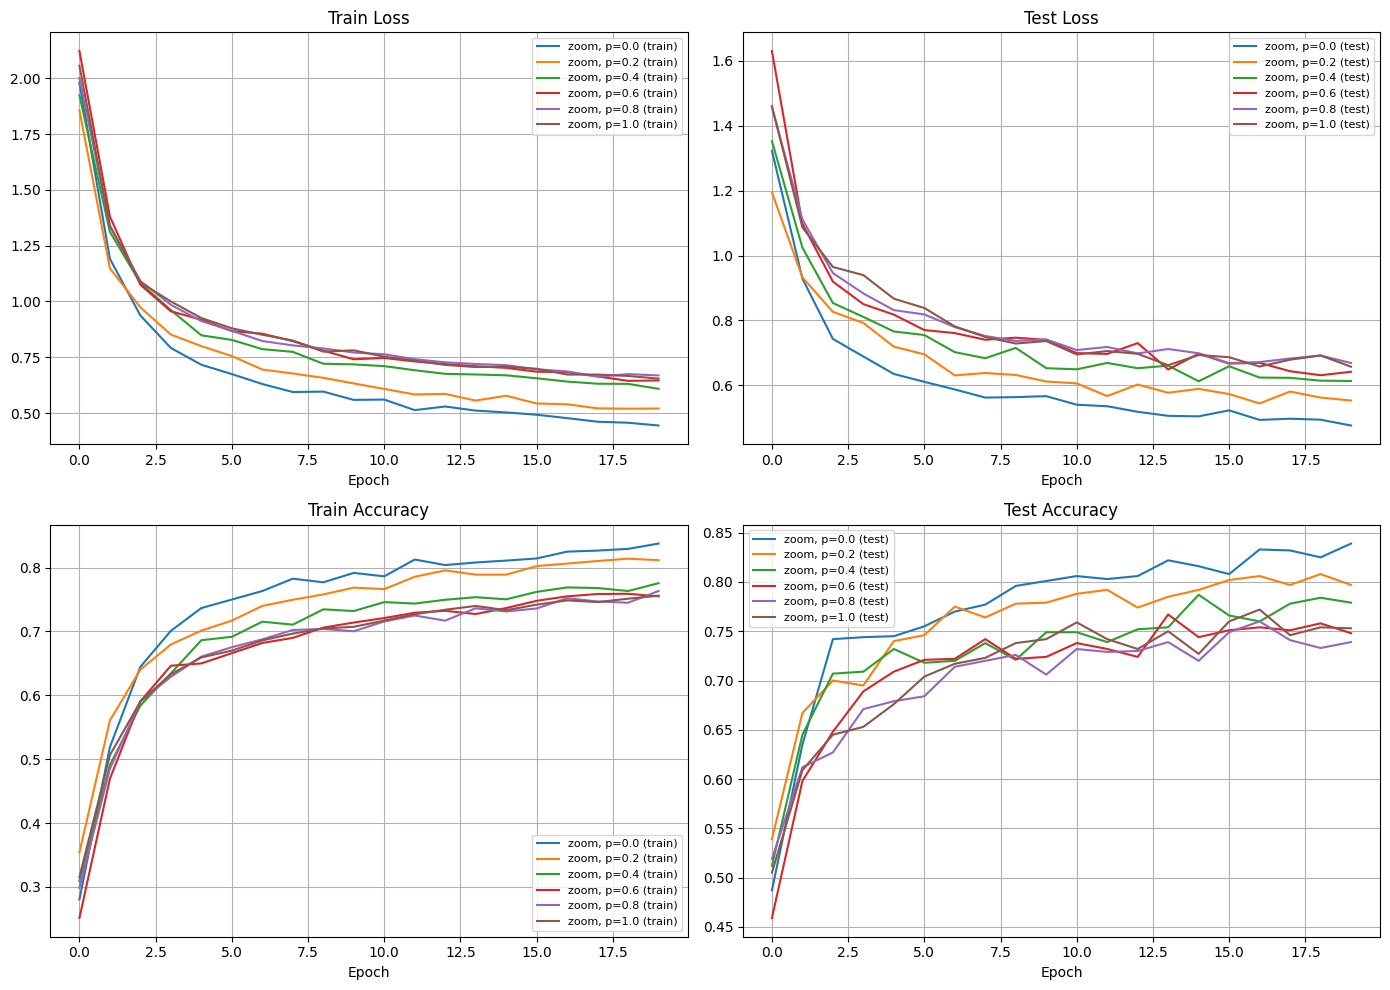

In [76]:
experiments = [(f"zoom, p={p}", Compose([RandomZoom((1.0, 2.0),p=p), ToTensor()]))
                for p in ps]
run_experiment(experiments)